# Facial Recognition
##  Applications:
### --> Surveillance system: Recognizing person(criminal/fugitive etc.) accross a video stream or CCTV.
### -->  Identification/ Login or attendence system.
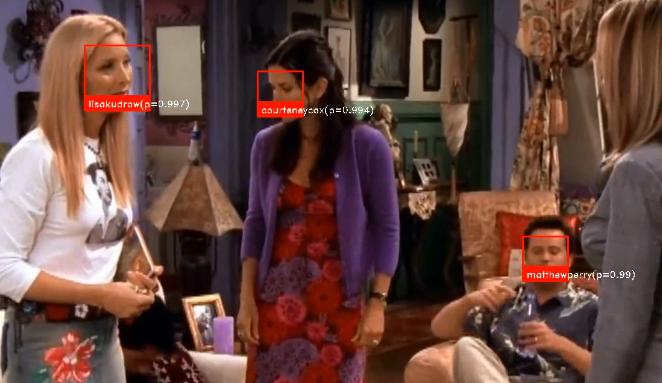

## Model Theory
### 1. CNN based model is used to detect Face(Results in very less number of false negatives
### 2. Used Face-landmarks as feature to recognize faces(classification)
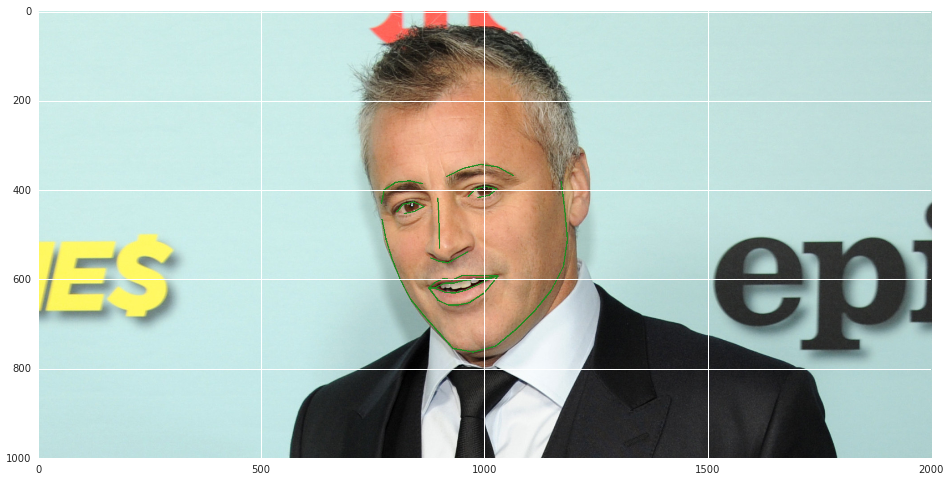
### 3. Data preprocessing: 
#### Data images are filtered(containing multiple faces)
#### --> Class imbalance is removed using resampling and SMOTE
#### --> Partial Fit is used to incorporate incremental learning, so that data can repeatedly trained on old model without retraining as a whole

### libraries required:
* Sklearn
* Pandas,numpy
* Pandas_ml
* OpenCV,face_recognition(prebuild functions for dlib),dlib


In [1]:
from facial_recognition import *
%matplotlib inline

#### Saving Directory

In [2]:
data_path='data_folder/'

#### Collecting Data
* Data is collected via google images utility is developed which can download directly from google images
*  Assumption(n=100) images from google are from same character(query) search for

#### Testing
* For testing purpose we use cast list of different TV series and build model on top of that
* For testing purpose TVDB or TMDB are used for getting cast list


##### TVDB

In [3]:
series_name='friends'
cast_list=get_cast_name_tvdb(series_name)
print(cast_list,len(cast_list))

([u'Lisa Kudrow', u'Matt LeBlanc', u'Matthew Perry', u'Courteney Cox', u'David Schwimmer', u'Jennifer Aniston'], 6)


##### TMDB

In [3]:
series_name='friends'
cast_list=get_cast_name_tmdb(series_name)
print(cast_list,len(cast_list))

([u'Courteney Cox', u'Matt LeBlanc', u'Jennifer Aniston', u'David Schwimmer', u'Lisa Kudrow', u'Matthew Perry'], 6)


#### Downloading Data
* once cast list is generated same can be used for downloading image, using <i> downloaded_images</i>
* keywords : Extra text which is appended to each character in cast_list to filter down search more, ex Matt LeBlanc friends where friends is keyword

In [ ]:
downloaded_images(data_path=data_path+series_name+'/',cast_list=cast_list,keywords=[series_name]*len(cast_list))

#### Prepare Data
-returns [X,y] write label file in models folder under data_path  

* prepare data by passing reading path of images, minimum number of images(optional), maximum number of images(optional) and dump path
* only those folder will be read which have minimum number of images(l_threshold), only those folder will be read which have minimum number of images(l_threshold default 20), 
* if number of images is greater than r_threshold that folder is ignored(default is None)


In [6]:
[X,y]=prepare_data(data_path=data_path+series_name+'/',l_threshold=10,dump_file_path=data_path+series_name+'/')
#[X,y]=pickle.load(open(data_path+series_name+'/'+'_encoded_file.pickle','rb'))

dumping output
returning prepare data


#### Training model
* Incremental training is done using partial fit utility of sk-learn, thus trained model can be pass again as bas_more for new data 
* Wrote a custom function to train model, which take care of unbalanced classes using SMOTE and resampling
* internally it will train multi based model until threshold_accuracy is reached, in each iteration training data is reshuffled. 
* number of retraining can be control by param n_retrain


In [7]:
clf_sgd=SGDClassifier(loss='log',n_jobs=7,\
                      shuffle=True,class_weight=None,warm_start=False\
                      ,n_iter = np.ceil(10**6 / 600),average=True)
clf_sgd=train_model(clf_sgd,X,y,minm_image_process=100,threshold_accuracy=0.82,classes=list(range(1,10)),n_retrain=10)

entering training module
StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None)
inside preprocessing function
returning from preprocess data
classes must be passed on the first call to partial_fit.


/usr/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


('accuracy in iteration ', 1, ' is =', 0.94936708860759489)
returning from train module


In [ ]:
pickle.dump(clf_sgd,open(data_path+series_name+'/'+'models/sgd_classifier.pickle','wb'),protocol=2)

In [4]:
clf_sgd=pickle.load(open(data_path+series_name+'/'+'models/sgd_classifier.pickle','rb'))

#### Testing model
* Testing can be done on any video(frames),
* for downloading video we can use youtube-dl

*We can use -F flag to check the format code and then -f flag to download that video

In [6]:
!youtube-dl -F https://www.youtube.com/watch?v=7qdwFQgMyVs

[youtube] 7qdwFQgMyVs: Downloading webpage
[youtube] 7qdwFQgMyVs: Downloading video info webpage
[youtube] 7qdwFQgMyVs: Extracting video information
[info] Available formats for 7qdwFQgMyVs:
format code  extension  resolution note
249          webm       audio only DASH audio   52k , opus @ 50k, 1.62MiB
250          webm       audio only DASH audio   69k , opus @ 70k, 2.05MiB
171          webm       audio only DASH audio  121k , vorbis@128k, 3.54MiB
140          m4a        audio only DASH audio  127k , m4a_dash container, mp4a.40.2@128k, 4.36MiB
251          webm       audio only DASH audio  134k , opus @160k, 3.86MiB
278          webm       256x144    144p  110k , webm container, vp9, 30fps, video only, 3.38MiB
160          mp4        256x144    144p  111k , avc1.4d400c, 30fps, video only, 1.93MiB
133          mp4        426x240    240p  201k , avc1.4d4015, 30fps, video only, 3.40MiB
242          webm       426x240    240p  242k , vp9, 30fps, video only, 6.58MiB
243          webm     

In [7]:
!youtube-dl -f 137 https://www.youtube.com/watch?v=7qdwFQgMyVs

[youtube] 7qdwFQgMyVs: Downloading webpage
[youtube] 7qdwFQgMyVs: Downloading video info webpage
[youtube] 7qdwFQgMyVs: Extracting video information
[download] Destination: Friends - HD - The Videotape-7qdwFQgMyVs.mp4
[download] 100% of 72.08MiB in 01:18.75KiB/s ETA 00:0091


##### testing on a video 
*get_pred_on_frame returns prediction on frame*

In [ ]:
get_video_processed('Friends - HD - The Videotape-7qdwFQgMyVs.mp4',data_path=data_path+series_name+'/'\
                    ,model=clf_sgd,skip_frames=10)

#### processed output
vlcsnap-2018-01-11-22h46m06s165.png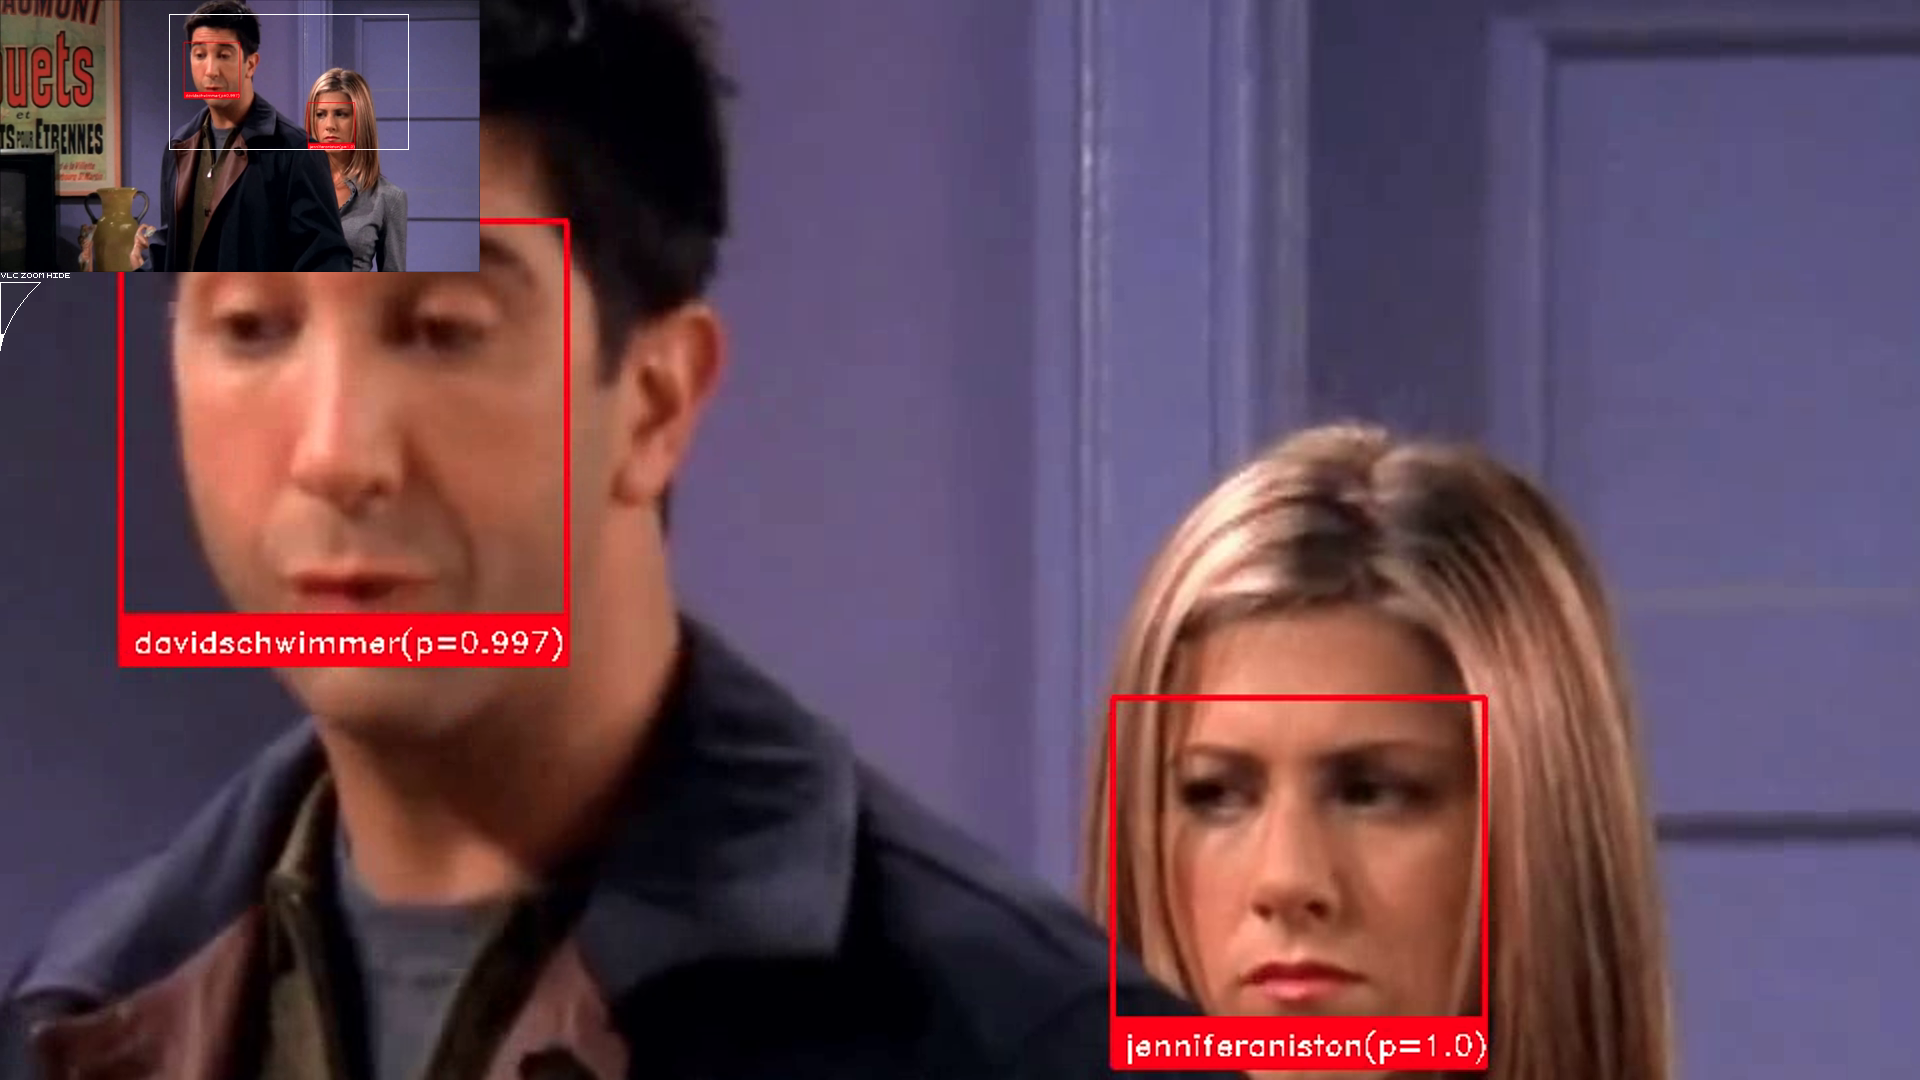
- Note: any output with less than .8 probablilty is not correct